In [1]:
import jax.numpy as np
import tensorflow as tf
import neural_tangents as nt

from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [42]:
from jax import random
from neural_tangents import stax

N = 600
P = 1000

gamma = P/N

init_fn, apply_fn, kernel_fn = stax.serial(
    stax.Dense(P), #stax.Identity(),
    stax.Dense(1)
)


key1, key2 = random.split(random.PRNGKey(1))
x1 = random.normal(key1, (N, 1))
x2 = random.normal(key2, (N, 1))

In [43]:
W = random.normal(key=key2, shape=(P, 1)) / np.sqrt(P)
def apply_fn(W, x, rng=None):
    return np.outer(x, W).sum(-1)

In [44]:
kernel_fn = nt.empirical_kernel_fn(apply_fn)
K = kernel_fn(x1, x1, W, 'ntk')

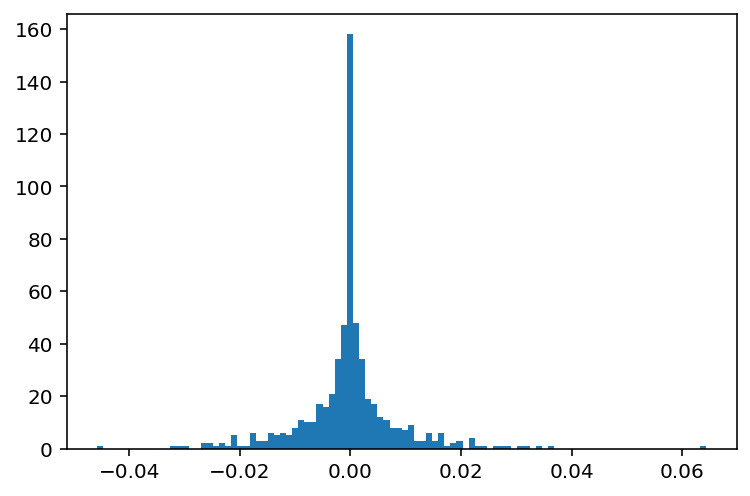

In [45]:
eigvals, eigvecs = np.linalg.eigh(K)
hist = plt.hist(eigvals[:-1], bins = 100)

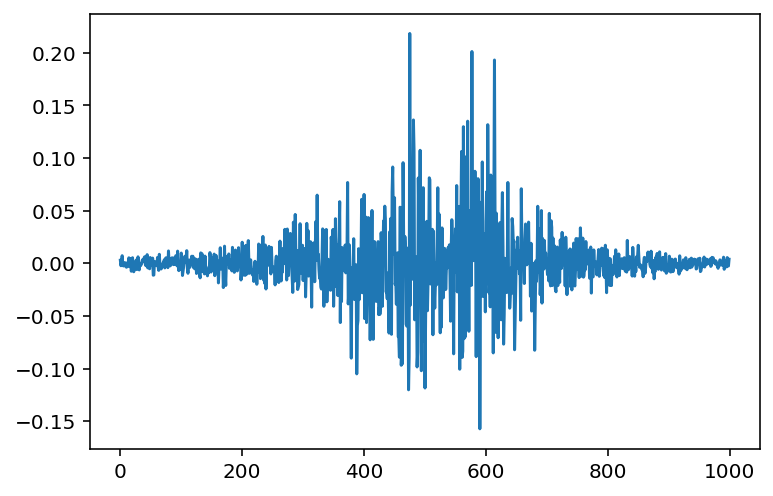

In [82]:
plt.plot(eigvecs[-7])

In [21]:
v = eigvecs[-1]

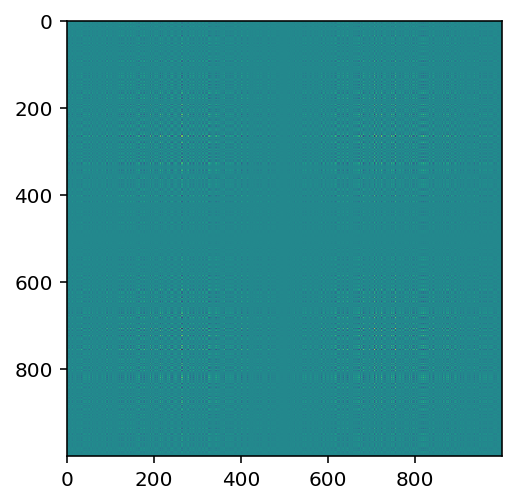

In [23]:
plt.imshow(np.outer(v, v))

In [29]:
np.outer(v, v)

array([[ 1.0698928e-03,  1.6288816e-04,  4.6505182e-04, ...,
        -1.6557665e-04,  1.1571101e-04, -8.0374646e-04],
       [ 1.6288816e-04,  2.4799267e-05,  7.0802831e-05, ...,
        -2.5208579e-05,  1.7616676e-05, -1.2236815e-04],
       [ 4.6505182e-04,  7.0802831e-05,  2.0214474e-04, ...,
        -7.1971437e-05,  5.0296272e-05, -3.4936564e-04],
       ...,
       [-1.6557665e-04, -2.5208579e-05, -7.1971437e-05, ...,
         2.5624649e-05, -1.7907441e-05,  1.2438784e-04],
       [ 1.1571101e-04,  1.7616676e-05,  5.0296272e-05, ...,
        -1.7907441e-05,  1.2514374e-05, -8.6926768e-05],
       [-8.0374646e-04, -1.2236815e-04, -3.4936564e-04, ...,
         1.2438784e-04, -8.6926768e-05,  6.0380669e-04]], dtype=float32)

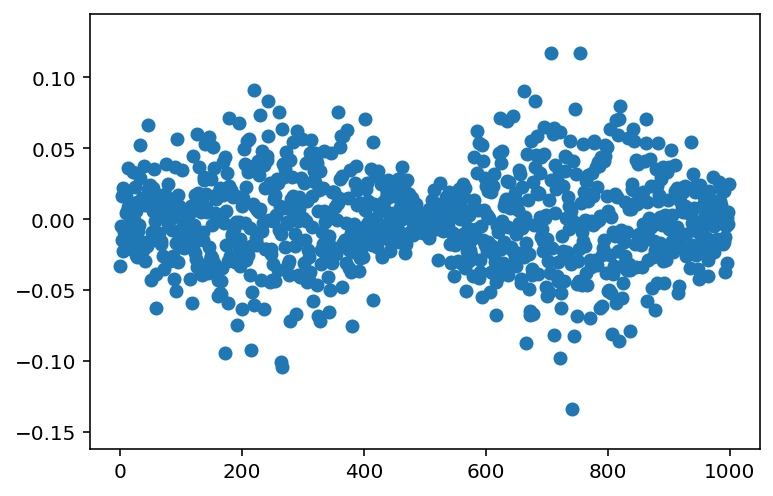

In [32]:
plt.scatter(np.arange(len(v)), v)

In [26]:
K.mean()

DeviceArray(0.24354626, dtype=float32)

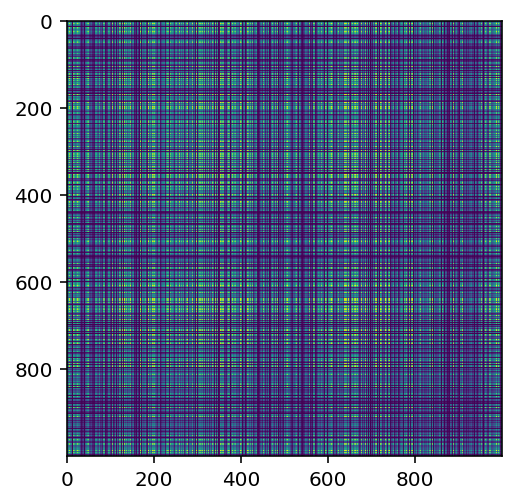

In [24]:
plt.imshow(K)

In [ ]:
a = ((gamma-1)/gamma)**2
b = ((gamma+1)/gamma)**2
def H(x): 
    return (gamma**2 / (2 * np.pi * x)  * np.sqrt((b-x)*(x-a))) * (x > a) * (x < b)


x = np.arange(a, b, .00001)
plt.plot(x, H(x))

In [127]:
import neural_tangents as nt

x_train, x_test = x1, x2
y_train = (x1[:,0] + x1[:,1]*np.cos(x1[:,0])).reshape(-1,1) + random.uniform(key1, shape=(100, 1))

y_test_nngp = nt.predict.gp_inference(kernel_fn, x_train, y_train, x_test,
                                      get='nngp')
# (20, 1) np.ndarray test predictions of an infinite Bayesian network

y_test_ntk = nt.predict.gp_inference(kernel_fn, x_train, y_train, x_test,
                                     get='ntk')
# (20, 1) np.ndarray test predictions of an infinite continuous
# gradient descent trained network at convergence (t = inf)

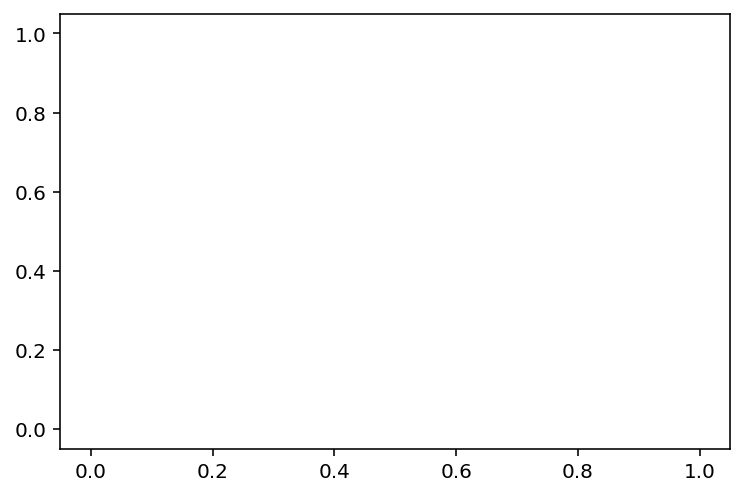

In [128]:
plt.scatter(x_test[:,0], y_test_ntk)

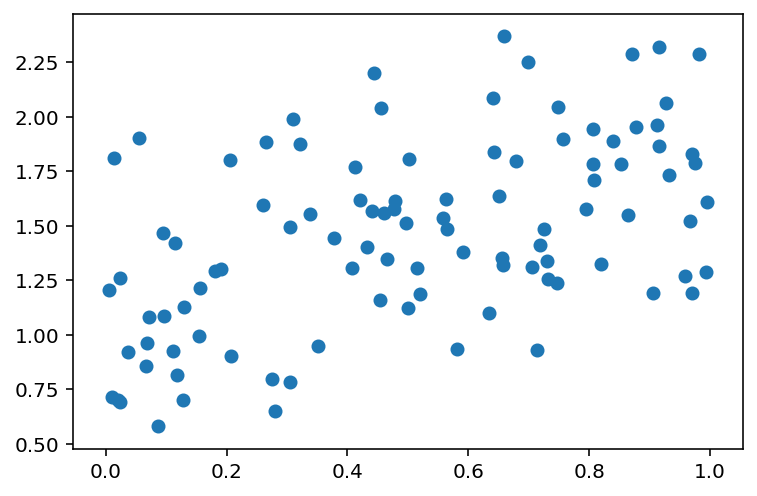

In [129]:
plt.scatter(x_train[:,0], y_train)